This script generates quantum circuit for a one-body time-evolution operator under a Hamiltonian $$ H = \sum_{i=0}^{N} \vec{b} \cdot \vec{\sigma_i} , $$  where the normalized vector given by $ \vec{b}= \frac{\delta m^2}{4E} * (sin(2\theta_\nu), 0 , -cos(2\theta_\nu)) $ with $\theta_\nu $ as the mixing angle, $\delta m^2$ as the mass difference squared, E as the energies of the neutrino beam, and $ \vec{\sigma_i} $ are the Pauli matrices for the i-th qubit. The operator $ U_1(dt) $ is the time-evolution operator for time dt. This one-body part is the tensor product of the same single-qubit gate applied to each qubit given as:

$$
U_1(dt) = \bigotimes_{i=0}^{N-1} \exp(-i\vec{b} \cdot \vec{\sigma_i}dt).
$$


To simulate this time-evolution in a quantum circuit, we can apply rotation gates to each qubit corresponding to the exponentiated Pauli terms. The term $ -i \vec{b} \cdot \vec{\sigma_i} dt $ suggests rotations around the axes defined by the vector $ \vec{b} $. If we decompose $ \vec{b} $ into its Cartesian components $\vec{b} = (b_x, b_y, b_z) $, this translates to rotations around the x, y, and z axes by angles proportional to $ b_x dt $,  $b_y dt $, and $ b_z dt $ respectively.



As a simplification of our system, we consider our vaccum oscillations to be in the z feild such that the $ \vec{b}= \frac{\delta m^2}{4E} * (1,0,0) $ and only pauli matrix is the ${\sigma_x}$ for our simplified Hamiltonian of: $$ H = \sum_{i=0}^{N} b_x \sigma_x , $$

However, given that our $b_x$​ value is defined as δm^2 /(4 E), we need to take into account this multiplicative constant that represents the strength of vacuum oscillations. We need to explore what would be equivalently done to use the Rx (rotation about x) gate instead of X gate to embed this constant. In qiskit these gates are given as:
$$
RX(\lambda) = \exp\left(-\frac{i\lambda}{2}X\right) = \begin{pmatrix}
cos(\lambda/2) & -isin(\lambda/2) \\
-isin(\lambda/2) & cos(\lambda/2)
\end{pmatrix}
$$


where 
$$ X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} $$

But we also know from evolution 
$$\psi(t) = e^{-iH \Delta t} \psi(0) \\
         = e^{-i \Delta t \sum_j^N b_{x_j} \sigma_{x_j}} \psi(0)  (for N qubits)\\ 
         = e^{-i \Delta t b_{x_0} \sigma_{x_0}} e^{-i \Delta t b_{x_1} \sigma_{x_1}} ...  \psi(0)  \tag{1.1}
$$ 
(also note $\Delta t$ = dt from above)

So comparing the expression from above $RX(\lambda) = \exp\left(-\frac{i\lambda}{2}X\right) $ with Eq.(1.1) we realize $\lambda/2 = \Delta t b_0$ for 1st qubit and similarly for other qubits. Hence plugging in this expression for $\lambda$ in the Eq(1.1) we get: 

$$ \psi(t) = RX^{(0)}(2 \Delta t b_0) RX^{(1)}(2 \Delta t b_1) ...\psi(0) \tag{1.2} $$ 

We see from Eq(1.2) that a X gate($\sigma_x$) is equivalent to rotation RX gate on the bloch sphere for each qubit by an angle $2 \Delta t b_0$ (for first qubit) and so on..


We generate the quantum circuit for this hamitonian below. 

/home/zohalaraib/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


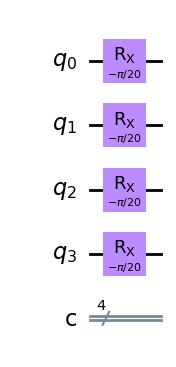

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from math import pi
# Number of qubits
N = 4  # Arbitrary

# Create a quantum circuit for N qubits
qc = QuantumCircuit(N,N)

# Apply RZ gates to each qubit with the calculated theta
for i in range(N):
    # Define the constants and the simulation time
    delta_m_squared = 2*pi  # Replace with the actual value
    E = 1  # Replace with the actual value of the energy
    dt = 0.05  # Replace with the simulation time step
    b = - delta_m_squared / (4 * E)  # b_z for any arbitray site
    theta= 2*dt*b # Calculate the angle for RZ gates 
    qc.rx(theta, i)


# Display the circuit
qc.draw('mpl')

